<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Alzheimer%E2%80%99s_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CASO DE ESTUDIO SOBRE LA DETECCIÓN DE ALZHEIMER CON MODELOS DE APRENDIZAJE AUTOMÁTICO SUPERVISADO***

La base de datos contiene información diversa sobre factores de riesgo para el Alzheimer, incluyendo edad, género, nivel educativo, actividad física, consumo de alcohol, tabaquismo, condiciones médicas, hábitos dietéticos, entre otros.El objetivo será predecir la variable "Alzheimer’s Diagnosis" (Sí/No), por lo que es un problema de clasificación.

1. Leer datos, por favor cargue los datos en la parte izquierda donde esta el icono de la carpeta y en los tres puntos "..." copie la ruta para reemplazar la que esta en el código:

In [1]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/sample_data/alzheimers_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para explorar la estructura de los datos
df.head()


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


2. Se dividen los datos en entrenamiento y validación

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copia del dataframe para preprocesamiento
df_processed = df.copy()

# Convertir la variable objetivo a binaria (0 = No, 1 = Sí)
df_processed["Alzheimer’s Diagnosis"] = df_processed["Alzheimer’s Diagnosis"].map({"No": 0, "Yes": 1})

# Identificar columnas categóricas
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# Aplicar Label Encoding a variables categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Separar características (X) y variable objetivo (y)
X = df_processed.drop(columns=["Alzheimer’s Diagnosis"])
y = df_processed["Alzheimer’s Diagnosis"]

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((59426, 24), (14857, 24), (59426,), (14857,))

3. Se crean los modelos y se entrenan, de igual forma se establece el indicador de precisión "Accuracy"

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Entrenar modelo de Máquinas de Soporte Vectorial (SVM)
#svm_model = SVC(kernel="linear", probability=True)
svm_model = SVC(kernel="linear", probability=False)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Entrenar modelo de Red Neuronal (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Resultados de precisión
accuracy_logistic, accuracy_svm, accuracy_mlp


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# ================================
# 6. Regresión Logística
# ================================
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# ================================
# 7. SVM optimizado (LinearSVC)
# ================================
svm_model = LinearSVC(max_iter=5000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# ================================
# 8. Red Neuronal (MLP)
# ================================
mlp_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    max_iter=500,
    random_state=42
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)


In [9]:
print("Accuracy Regresión Logística:", accuracy_logistic)
print("Accuracy SVM (LinearSVC):", accuracy_svm)
print("Accuracy Red Neuronal (MLP):", accuracy_mlp)

Accuracy Regresión Logística: 0.7123241569630477
Accuracy SVM (LinearSVC): 0.7128626236790738
Accuracy Red Neuronal (MLP): 0.7000067308339504


4. Se generan las matrices de confusión para evaluar de mejor forma los resultados de cada modelo

In [7]:
from sklearn.metrics import confusion_matrix

# Generar matrices de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

conf_matrix_logistic, conf_matrix_svm, conf_matrix_mlp



(array([[6899, 1820],
        [2454, 3684]]),
 array([[6874, 1845],
        [2421, 3717]]),
 array([[6521, 2198],
        [2259, 3879]]))

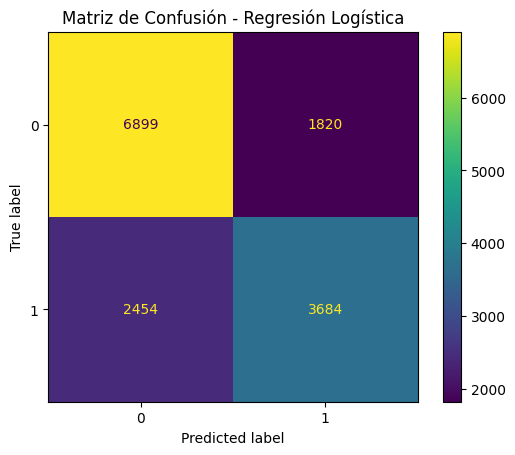

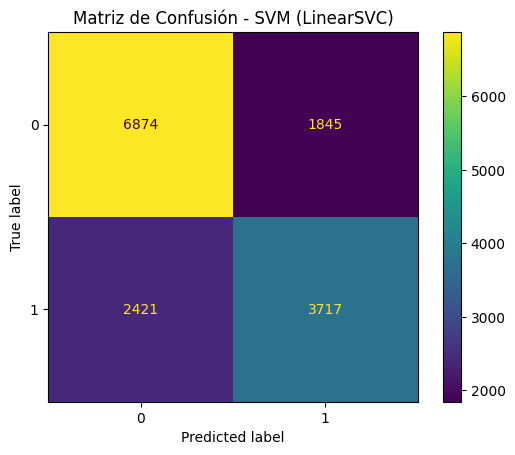

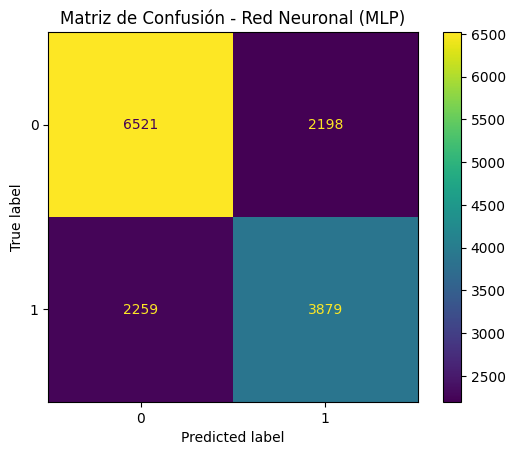

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ================================
# Matriz de confusión - Regresión Logística
# ================================
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(cm_logistic).plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# ================================
# Matriz de confusión - SVM
# ================================
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("Matriz de Confusión - SVM (LinearSVC)")
plt.show()

# ================================
# Matriz de confusión - MLP
# ================================
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm_mlp).plot()
plt.title("Matriz de Confusión - Red Neuronal (MLP)")
plt.show()
